In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import numpy as np
import matplotlib as plt
import torch
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import keras


2025-10-27 11:33:42.530164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761564822.831003      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761564822.918239      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#resize 
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    
])

In [4]:
data_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

In [5]:
dataset= datasets.ImageFolder(root=data_dir, transform=transform)
print (f"Total Img= {len(dataset)}")
print(f"Class={dataset.classes}")

Total Img= 253
Class=['no', 'yes']


In [6]:
train_size = int(0.85 * len (dataset))
test_size = len(dataset) - train_size
train, test = random_split(dataset,[train_size,test_size])
print(f"Number of training images: {len(train)}")
print(f"Number of testing images: {len(test)}")

Number of training images: 215
Number of testing images: 38


In [7]:
train_loader= DataLoader(train, batch_size = 16, shuffle =True)
test_loader = DataLoader(test, batch_size=16, shuffle=False)

In [8]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image

In [9]:
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [11]:
net = BrainTumorCNN().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002)

In [12]:
epochs = 50
for epoch in range(epochs):
    net.train()
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")
torch.save(net.state_dict(), 'brain_tumor_custom_cnn.pth') 

Epoch 1/50, Loss: 0.6989
Epoch 2/50, Loss: 0.6930
Epoch 3/50, Loss: 0.6883
Epoch 4/50, Loss: 0.6851
Epoch 5/50, Loss: 0.6824
Epoch 6/50, Loss: 0.6783
Epoch 7/50, Loss: 0.6751
Epoch 8/50, Loss: 0.6735
Epoch 9/50, Loss: 0.6715
Epoch 10/50, Loss: 0.6677
Epoch 11/50, Loss: 0.6653
Epoch 12/50, Loss: 0.6672
Epoch 13/50, Loss: 0.6633
Epoch 14/50, Loss: 0.6633
Epoch 15/50, Loss: 0.6579
Epoch 16/50, Loss: 0.6574
Epoch 17/50, Loss: 0.6553
Epoch 18/50, Loss: 0.6584
Epoch 19/50, Loss: 0.6528
Epoch 20/50, Loss: 0.6474
Epoch 21/50, Loss: 0.6463
Epoch 22/50, Loss: 0.6430
Epoch 23/50, Loss: 0.6363
Epoch 24/50, Loss: 0.6371
Epoch 25/50, Loss: 0.6378
Epoch 26/50, Loss: 0.6339
Epoch 27/50, Loss: 0.6224
Epoch 28/50, Loss: 0.6215
Epoch 29/50, Loss: 0.6241
Epoch 30/50, Loss: 0.6143
Epoch 31/50, Loss: 0.6138
Epoch 32/50, Loss: 0.6190
Epoch 33/50, Loss: 0.6086
Epoch 34/50, Loss: 0.5964
Epoch 35/50, Loss: 0.5952
Epoch 36/50, Loss: 0.5940
Epoch 37/50, Loss: 0.5885
Epoch 38/50, Loss: 0.5783
Epoch 39/50, Loss: 0.

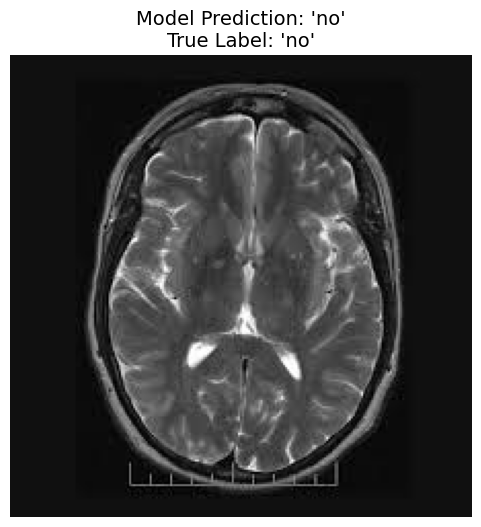

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

def predict_image(image_path, model, class_names):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_idx = torch.max(output, 1)
    prediction = class_names[predicted_idx.item()]
    return prediction

try:
    first_test_image_info = test.dataset.samples[test.indices[3]]
    first_test_image_path = first_test_image_info[0]
    true_label_index = first_test_image_info[1]
    true_label = dataset.classes[true_label_index]
    prediction = predict_image(first_test_image_path, net, dataset.classes)
    image_to_show = Image.open(first_test_image_path)
    plt.figure(figsize=(6,6))
    plt.imshow(image_to_show)
    plt.title(f"Model Prediction: '{prediction}'\nTrue Label: '{true_label}'", fontsize=14)
    plt.axis('off')
    plt.show()
except IndexError:
    print("Could not retrieve a test image path for prediction.")